### Libraries:

In [2]:
#General:
import numpy as np
import pandas as pd

#Regex
import re

#Plotting:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

### Functions:

In [28]:
#Function to group the list of original emotions for a multiclass classification
def emotions_aggregator(df, list_of_emotions, name_of_new_variable):
    # Duplicating the DF
    new_df = df.copy()
    
    # Creating the new variable
    new_df[name_of_new_variable] = new_df[list_of_emotions].apply(lambda row: 1 if any(row) else 0, axis=1)
    
    # Dropping emotion columns from the original DataFrame
    new_df.drop(list_of_emotions, axis=1, inplace=True)
    
    return new_df

## Non- Aggregated File

In [3]:
#Uploading the CSV
raw_df = pd.read_csv('../data/raw_post_wrangling.csv', index_col=[0])

#Sanity check:
raw_df.head(3)

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,admiration,amusement,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,total_emotions
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,2019-01-02 11:15:44,37,0,0,...,0,0,0,0,0,0,0,0,1,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,18,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207814 entries, 0 to 211223
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   text            207814 non-null  object
 1   id              207814 non-null  object
 2   author          207814 non-null  object
 3   subreddit       207814 non-null  object
 4   link_id         207814 non-null  object
 5   parent_id       207814 non-null  object
 6   created_utc     207814 non-null  object
 7   rater_id        207814 non-null  int64 
 8   admiration      207814 non-null  int64 
 9   amusement       207814 non-null  int64 
 10  anger           207814 non-null  int64 
 11  annoyance       207814 non-null  int64 
 12  approval        207814 non-null  int64 
 13  caring          207814 non-null  int64 
 14  confusion       207814 non-null  int64 
 15  curiosity       207814 non-null  int64 
 16  desire          207814 non-null  int64 
 17  disappointment  207814 non-nu

### Emotions:

In [5]:
#Df of the emotions
emotions = raw_df.iloc[:, 10:35]

#Grouping by emotions and sorting
emotions_sumed = emotions.sum()

#Creating a DF
emotions_grouped = pd.DataFrame({'emotions': emotions_sumed.index, 'total_ratings': emotions_sumed.values})

#Sorting the DF
emotions_grouped = emotions_grouped.sort_values(by='total_ratings', ascending=False)


In [6]:
# Max emotions (top 10)
max_emotions = emotions_grouped.head(10)

# Min emotions (bottom 10)
min_emotions = emotions_grouped.tail(10)

In [7]:
max_emotions

,emotions,total_ratings
2,approval,17620
1,annoyance,13618
13,gratitude,11625
8,disapproval,11424
5,curiosity,9692
20,realization,8785
18,optimism,8715
7,disappointment,8469
16,love,8191
0,anger,8084


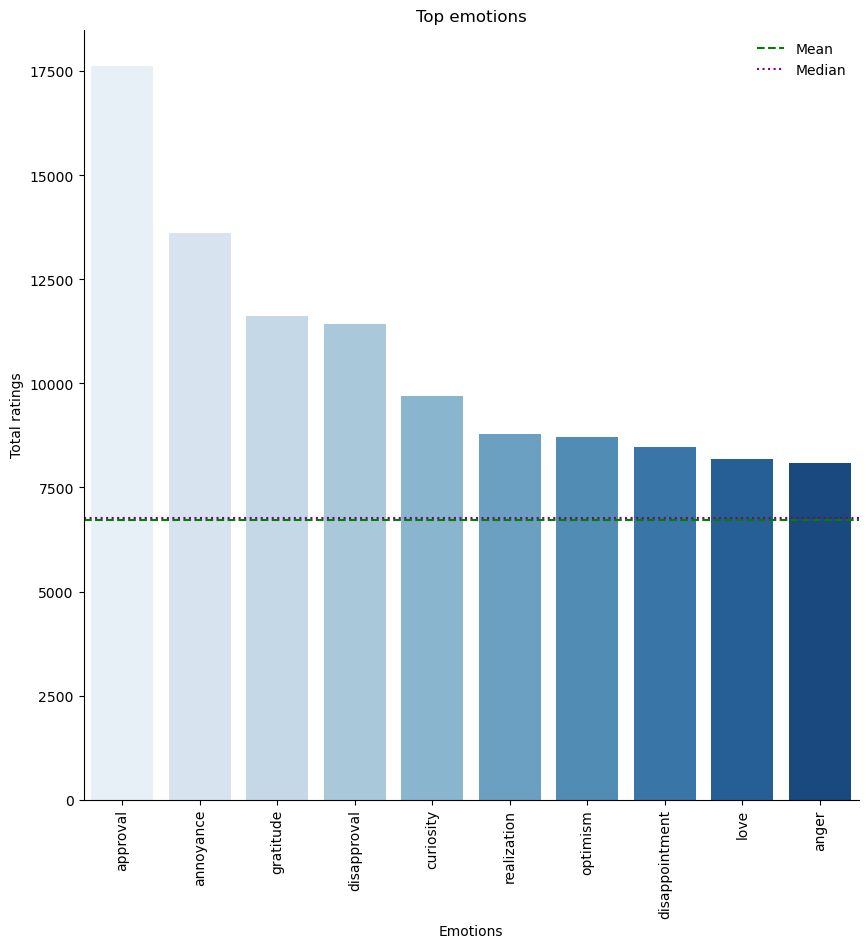

In [8]:
# Most common emotions:
# Set the number of colors based on the number of emotions
num_colors = len(max_emotions)
blues_palette = sns.color_palette('Blues', n_colors=num_colors)

# Set figure size
plt.figure(figsize=(10, 10))

# Barplot with sequential color palette
ax = sns.barplot(
    x='emotions',
    y='total_ratings',
    data=max_emotions,
    errorbar=None,
    palette=blues_palette
)

# Rotate x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Axes and Indices customization
plt.title("Top emotions")
plt.ylabel('Total ratings')
plt.xlabel('Emotions')

#Adding the average & median
average_total_ratings = emotions_grouped['total_ratings'].mean()
ax.axhline(average_total_ratings, color='green', linestyle='--', label='Mean')

#Median
median_total_ratings = emotions_grouped['total_ratings'].median()
ax.axhline(median_total_ratings, color='purple', linestyle='dotted', label='Median')




# Removing borders
sns.despine(fig=None, )

# Display the plot
plt.legend(frameon=False)
plt.show()

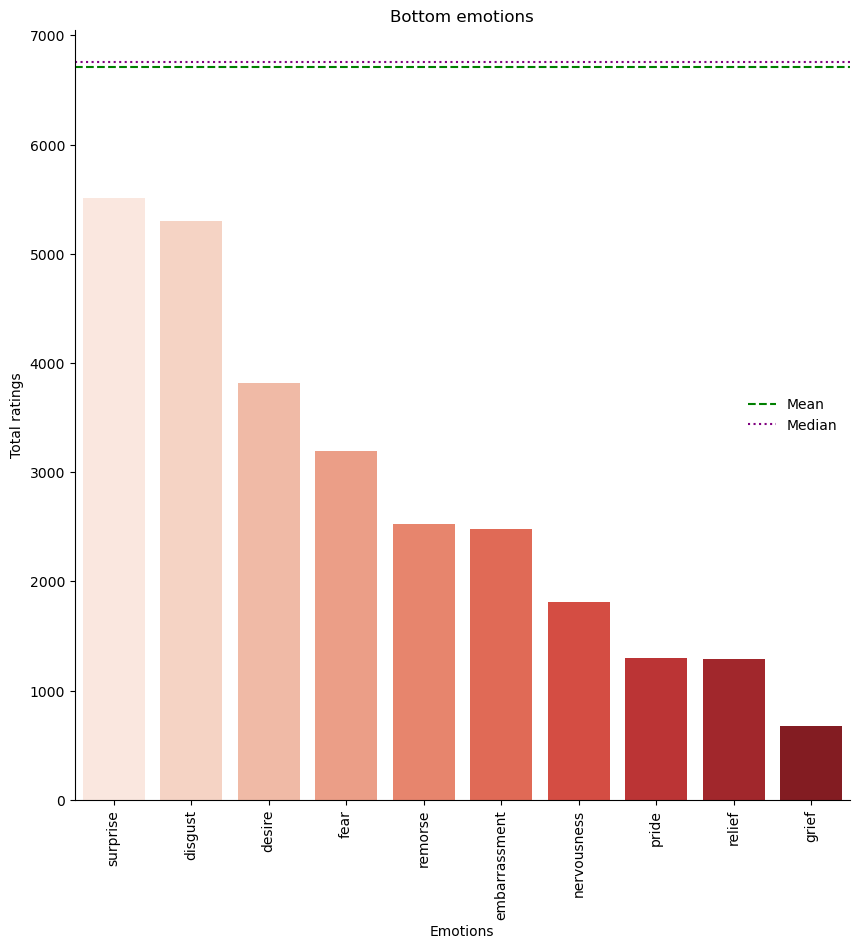

In [9]:
# Most common emotions:
# Set the number of colors based on the number of emotions
num_colors = len(min_emotions)
red_palette = sns.color_palette('Reds', n_colors=num_colors)

# Set figure size
plt.figure(figsize=(10, 10))

# Barplot with sequential color palette
ax = sns.barplot(
    x='emotions',
    y='total_ratings',
    data=min_emotions,
    errorbar=None,
    palette=red_palette
)

# Rotate x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Axes and Indices customization
plt.title("Bottom emotions")
plt.ylabel('Total ratings')
plt.xlabel('Emotions')

#Adding the average & median
average_total_ratings = emotions_grouped['total_ratings'].mean()
ax.axhline(average_total_ratings, color='green', linestyle='--', label='Mean')

#Median
median_total_ratings = emotions_grouped['total_ratings'].median()
ax.axhline(median_total_ratings, color='purple', linestyle='dotted', label='Median')

# Removing borders
sns.despine(fig=None, )

# Display the plot
plt.legend(frameon=False)
plt.show()


In [10]:
#Extracting the day with Regex
day_pattern = r'-(\d+)\s'

#New column of days
raw_df["day"] = raw_df["created_utc"].str.extract(day_pattern)

#Converting the value in an integer
raw_df["day"] = raw_df["day"].astype(int)

#Sanity check:
raw_df.head(10)

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,admiration,amusement,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,total_emotions,day
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,1,0,0,...,0,0,0,0,0,1,0,0,1,25
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,2019-01-02 11:15:44,37,0,0,...,0,0,0,0,0,0,0,1,1,2
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,18,0,0,...,0,0,0,0,0,0,0,0,1,20
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,2019-01-05 06:10:01,2,0,0,...,0,0,0,0,0,0,0,1,1,5
5,Right? Considering it’s such an important docu...,eespn2i,ImperialBoss,TrueReddit,t3_aizyuz,t1_eesoak0,2019-01-23 21:50:08,61,0,0,...,0,0,0,0,0,0,0,0,1,23
6,"He isn't as big, but he's still quite popular....",eczuekb,Rallings,cringe,t3_abeksv,t1_eczsmp8,2019-01-01 05:21:16,3,0,0,...,0,0,0,0,0,0,0,0,1,1
7,That's crazy; I went to a super [RELIGION] hig...,ed5tx8y,Beachy5313,TeenMomOGandTeenMom2,t3_ac10u9,t1_ed5tfyc,2019-01-03 17:22:38,23,0,1,...,0,0,0,0,0,0,0,0,1,3
8,that's adorable asf,ef961hv,RedRails1917,traaaaaaannnnnnnnnns,t3_akz2ia,t3_akz2ia,2019-01-29 12:05:43,73,0,1,...,0,0,0,0,0,0,0,0,1,29
9,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",edl7cr3,Tiagulus,youtubehaiku,t3_acuvb0,t1_edc21ip,2019-01-08 21:38:34,54,0,1,...,0,0,0,0,0,0,0,0,1,8
10,"I have, and now that you mention it, I think t...",ed9w1hm,[deleted],AskMenOver30,t3_acm7f6,t1_ed9m2l0,2019-01-05 03:17:43,36,0,0,...,0,0,0,0,0,0,0,1,1,5


In [11]:
#Df of the emotions per day
daily_emotions = raw_df.iloc[:, 10:38]

#Removing the total emotions
daily_emotions.drop('total_emotions', axis=1, inplace= True)

#List of the emotions:
emotions_list = emotions.columns.to_list()

#Grouping in days
daily_emotions_grouped = daily_emotions.groupby("day")[emotions_list].sum()

#Sanity check:
daily_emotions_grouped

#Turning it into a DF:
daily_emotions_grouped.reset_index(inplace=True)

In [13]:

# Set up the line chart using Plotly Express
fig = px.line(
    daily_emotions_grouped,
    x='day',
    y=daily_emotions_grouped.columns[1:],  # Exclude the 'day' column
    title='Emotion Trends',
    labels={'day': 'days (jan-19)', 'value': 'total reviews'},
    line_dash_sequence=['solid'] * len(daily_emotions_grouped.columns[1:]),
    line_shape='linear'
)

# Define color mapping for specific emotions
color_mapping = {
    'approval': 'darkblue',
    'annoyance': 'slateblue',
    'gratitude': 'lightblue',
    'grief': 'lightcoral',
    'relief': 'tomato',
    'nervousness': 'darkred',
}

# Customize the lines based on emotion colors
for trace in fig.data:
    emotion = trace.name
    if emotion in color_mapping:
        trace.line.color = color_mapping[emotion]
    else:
        trace.line.color = 'lightgrey'

# Show the plot
fig.show()


## Aggregate File:

In [14]:
## Aggregate
agg_df = pd.read_csv('../data/aggregate_post_wrangling.csv', index_col=[0])

#Sanity check:
agg_df.head(5)

,id,text,author,subreddit,link_id,parent_id,admiration,amusement,anger,annoyance,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,total_emotions
0,eczazk6,Fast as [NAME] will carry me. Seriously uptown...,Uptownorbust,NewOrleans,t3_abbbq3,t1_eczavr9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,eczb07q,You blew it. They played you like a fiddle.,ima_coder,self,t3_abca3b,t3_abca3b,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,eczb4bm,TL;DR No more Superbowls for [NAME]. Get ready...,social_psycho,steelers,t3_ab8t8l,t3_ab8t8l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eczb527,So much time saved. Not.,TouristsOfNiagara,Roadcam,t3_abal7g,t3_abal7g,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,eczb6r7,Emotes have a ridiculous amount of effort put ...,Reggiardito,Blackops4,t3_abasbo,t1_ecz9n7h,0,0,0,0,...,0,0,0,1,0,0,1,0,1,5


### Subreddit:

In [16]:
#Grouping by subreddit:
sub_reddits = agg_df.iloc[:, 3:36]

#List of the irrelevant columns
irrelevant_cols = sub_reddits.columns.to_list()

# Columns to remove
columns_to_remove = ["link_id", "parent_id", "created_utc", "rater_id"]
sub_reddits.drop("link_id", axis=1, inplace=True)
sub_reddits.drop("parent_id", axis=1, inplace=True)
#sub_reddits.drop("created_utc", axis=1, inplace=True)
#sub_reddits.drop("rater_id", axis=1, inplace=True)


In [17]:
# Subreddit DF
#sub_reddits.drop(columns= irrelevant_cols, inplace=True)

#Grouping it by subreddit
sub_reddits = sub_reddits.groupby('subreddit')[emotions_list].sum()

#Sanity check:
sub_reddits.reset_index(inplace=True)

In [18]:
sub_reddits

,subreddit,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,...,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise
0,2meirl4meirl,15,30,29,16,19,18,8,40,25,...,12,16,12,18,4,26,3,8,43,16
1,49ers,17,32,33,9,15,14,8,27,37,...,11,16,4,21,3,19,3,3,15,7
2,4PanelCringe,20,24,46,6,15,20,5,19,18,...,24,18,5,12,3,18,1,4,16,13
3,90DayFiance,20,36,46,7,21,26,13,26,33,...,24,17,7,14,1,34,3,4,12,20
4,90dayfianceuncensored,17,33,43,15,29,31,7,21,39,...,22,14,1,15,5,25,2,3,15,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,worldpolitics,19,36,27,6,13,12,4,18,25,...,7,4,3,9,1,16,0,5,12,7
479,yesyesyesyesno,28,41,38,7,14,18,6,23,18,...,21,12,7,13,4,21,2,4,16,13
480,youseeingthisshit,21,31,36,12,19,22,9,15,18,...,17,12,3,19,2,18,4,1,14,16
481,youtube,8,23,21,4,15,17,3,10,14,...,12,6,5,7,0,12,5,6,7,9


## Narrowing down the emotions to 3 groups:

In [44]:
print(emotions_list)

agg_df.head(3)

agg_df2 = agg_df.copy()

['anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise']


Negative:
- anger
- annoyance
- disappointment
- disapproval
- disgust
- confusion
- embarrassment
- fear
- grief
- remorse
- sadness

Positive:
- approval
- caring
- desire
- excitement
- gratitude
- joy
- love
- optimism
- pride
- realization
- relief



Neutral:
- curiosity
- nervousness
- neutral
- surprise

In [50]:

#List of the emotions
negative_emotions = ['anger', 'annoyance', 'disappointment', 'disapproval', 'disgust', 'confusion', 'embarrassment', 'fear', 'grief', 'remorse', 'sadness' ]
positive_emotions = ['approval', 'caring', 'desire', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'realization', 'relief', 'amusement', 'admiration']
neutral_emotions = ['curiosity', 'nervousness', 'neutral', 'surprise']

#List of the lists
emotions_lists = [negative_emotions, positive_emotions, neutral_emotions]


In [45]:
# Consolidation of the emotions
    
#Negative:
try:
    agg_df2 = emotions_aggregator(agg_df2, negative_emotions, 'negative_emotions')
except KeyError:
    pass

#Positive:
try:
    agg_df2 = emotions_aggregator(agg_df2, positive_emotions, 'positive_emotions')
except KeyError:
    pass

#Neutral:
try:
    agg_df2 = emotions_aggregator(agg_df2, neutral_emotions, 'neutral_emotions')
except KeyError:
    pass



In [47]:
agg_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58009 entries, 0 to 58008
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 58009 non-null  object
 1   text               58009 non-null  object
 2   author             58009 non-null  object
 3   subreddit          58009 non-null  object
 4   link_id            58009 non-null  object
 5   parent_id          58009 non-null  object
 6   total_emotions     58009 non-null  int64 
 7   negative_emotions  58009 non-null  int64 
 8   positive_emotions  58009 non-null  int64 
 9   neutral_emotions   58009 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 4.9+ MB


In [52]:
agg_df2.groupby('subreddit').sum()

,total_emotions,negative_emotions,positive_emotions,neutral_emotions
subreddit,,,,
2meirl4meirl,566,111,117,133
49ers,493,97,106,125
4PanelCringe,523,81,129,123
90DayFiance,629,106,151,153
90dayfianceuncensored,592,111,141,144
...,...,...,...,...
worldpolitics,376,78,74,94
yesyesyesyesno,521,101,119,129
youseeingthisshit,507,87,109,118
